![](https://i.imgur.com/OKFBWmc.jpeg)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


# Day 1: Explore the dataset's basic structure (columns, rows, types)

In [2]:
#read the csv into a Pandas dataframe
fraud_data_train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
fraud_data_test = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [3]:
#check the dataframe by printing the first 5 rows
fraud_data_train.head(5)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
fraud_data_test.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
#check the columns in the dataframe
fraud_data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
fraud_data_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
#we can find out about columns types and null values using info()
fraud_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
fraud_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Day 2: Identify missing values and basic data characteristics


In [9]:
# perform basic statistics
fraud_data_train.describe(include = 'all').transpose()
fraud_data_test.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,NaN,NaN,NaN,277859.0,160422.401459,0.0,138929.5,277859.0,416788.5,555718.0
trans_date_trans_time,555719,544760,2020-12-19 16:02:22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,555719.0,NaN,NaN,NaN,417838695528764096.0,1309836622980612608.0,60416207185.0,180042946491150.0,3521417320836166.0,4635330563105903.0,4992346398065154048.0
merchant,555719,693,fraud_Kilback LLC,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,555719,14,gas_transport,56370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,555719.0,NaN,NaN,NaN,69.39281,156.745941,1.0,9.63,47.29,83.01,22768.11
first,555719,341,Christopher,11443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,555719,471,Smith,12146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,555719,2,F,304886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,555719,924,444 Robert Mews,1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# print the mean, standard deviation, min, and max for the amt column
print("Fraud Statistics")

avg_amt = fraud_data_train["amt"].mean()
std_dev = fraud_data_train["amt"].std()
min_amt = fraud_data_train["amt"].min()
max_amt = fraud_data_train["amt"].max()

print(f"The average amount is {avg_amt}")
print(f"The std deviation for amount is {std_dev}")
print(f"The min amount is {min_amt}")
print(f"The max amount is {max_amt}")

Fraud Statistics
The average amount is 70.35103545607033
The std deviation for amount is 160.31603857152774
The min amount is 1.0
The max amount is 28948.9


In [11]:
# find the distribution for the is_fraud variable
fraud_data_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [12]:
# find the ratio
1289169/(1289169+7506)

0.9942113482561166

**As you can see, the ratio of not fraud to fraud is 99:1. This means that the data is heavily imbalanced and if we trained a binary classification model using this dataset, the model would be biased.**

In [13]:
# create a new column for standard time 
from datetime import datetime
fraud_data_train['standard_time'] = pd.to_datetime(fraud_data_train['unix_time'], unit='s')
fraud_data_test['standard_time'] = pd.to_datetime(fraud_data_test['unix_time'], unit='s')


#  Day 3: Data Visualization

**The dataset contains many features that should undergo principal component analysis(PCA) because of privacy concerns. For our data visualization, we will use only non-PII information.**

In [14]:
# drop pii and irrelevant columns
columns_to_drop = ['trans_date_trans_time','cc_num','first','last','street','zip','lat','long','city_pop', 'dob','trans_num','unix_time','merch_lat','merch_long']
fraud_data_train.drop(columns = columns_to_drop, inplace=True)


In [15]:
fraud_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1296675 non-null  int64         
 1   merchant       1296675 non-null  object        
 2   category       1296675 non-null  object        
 3   amt            1296675 non-null  float64       
 4   gender         1296675 non-null  object        
 5   city           1296675 non-null  object        
 6   state          1296675 non-null  object        
 7   job            1296675 non-null  object        
 8   is_fraud       1296675 non-null  int64         
 9   standard_time  1296675 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 98.9+ MB


In [16]:
columns_to_drop = ['trans_date_trans_time','cc_num','first','last','street','zip','lat','long','city_pop', 'dob','trans_num','unix_time','merch_lat','merch_long']
fraud_data_test.drop(columns = columns_to_drop, inplace=True)
fraud_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     555719 non-null  int64         
 1   merchant       555719 non-null  object        
 2   category       555719 non-null  object        
 3   amt            555719 non-null  float64       
 4   gender         555719 non-null  object        
 5   city           555719 non-null  object        
 6   state          555719 non-null  object        
 7   job            555719 non-null  object        
 8   is_fraud       555719 non-null  int64         
 9   standard_time  555719 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 42.4+ MB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import time 


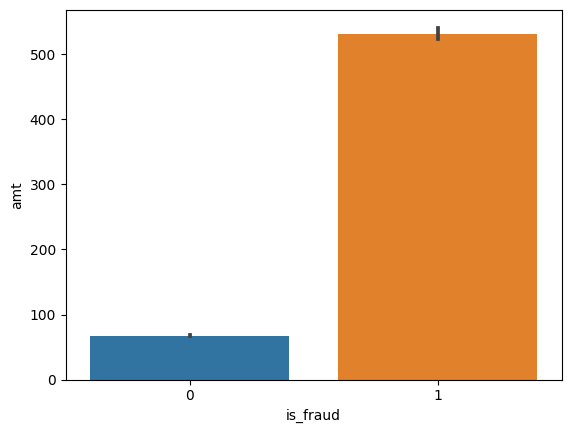

In [18]:
sns.barplot(x = "is_fraud", y = "amt", data = fraud_data_train)
plt.show()

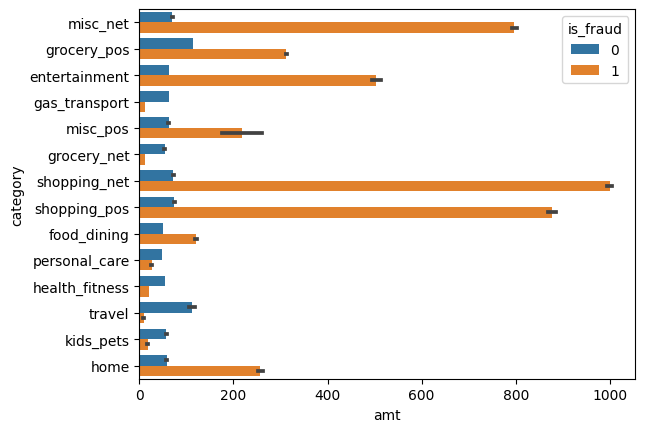

In [19]:
sns.barplot(x = "amt", y = "category", data = fraud_data_train, hue = "is_fraud")
plt.show()

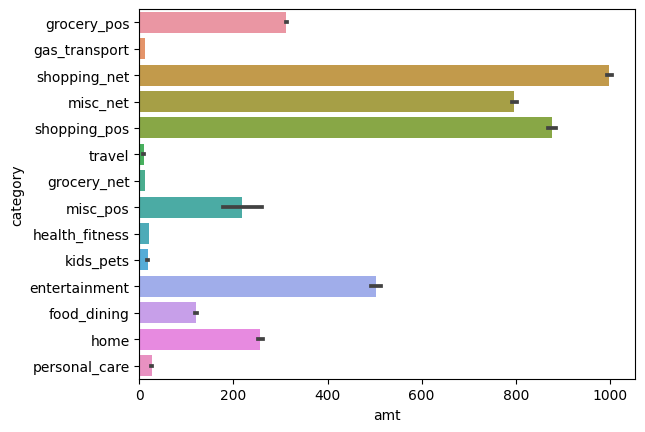

In [20]:
sns.barplot(x = "amt", y = "category", data = fraud_data_train[fraud_data_train['is_fraud'] == 1])
plt.show()

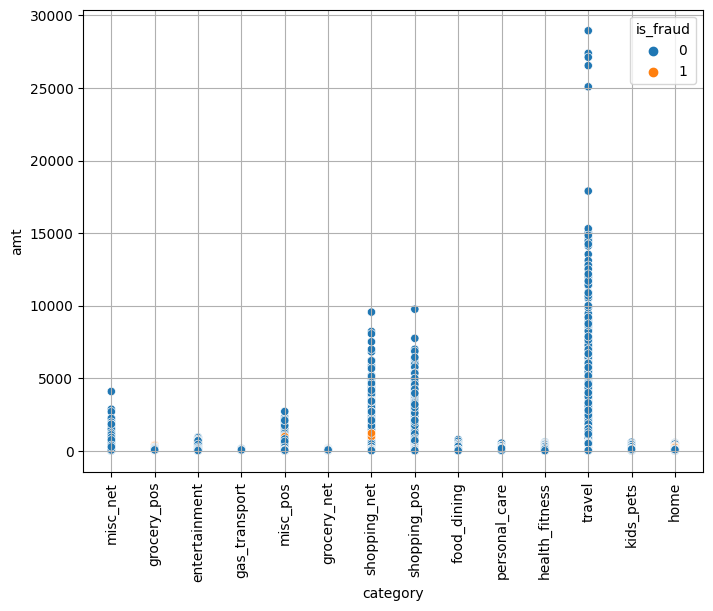

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "category", y = "amt", data = fraud_data_train, hue = "is_fraud")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

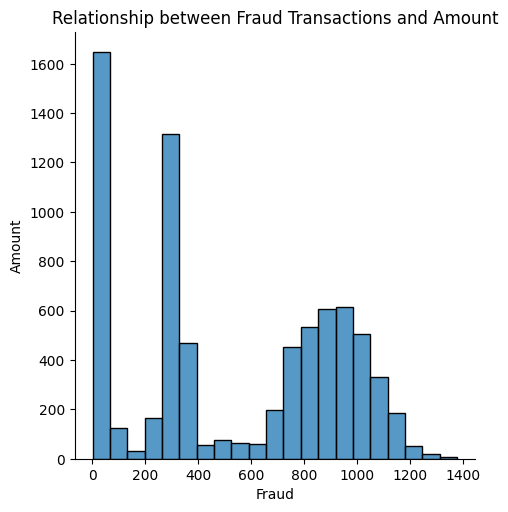

In [22]:
sns.displot(fraud_data_train[fraud_data_train['is_fraud'] == 1]['amt'])
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.title('Relationship between Fraud Transactions and Amount')
plt.show()

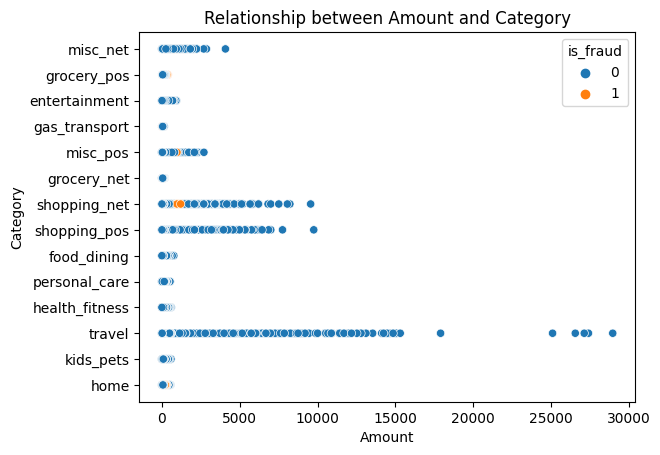

In [23]:
sns.scatterplot(x = 'amt', y = 'category', data = fraud_data_train, hue = 'is_fraud')
plt.xlabel('Amount')
plt.ylabel('Category')
plt.title('Relationship between Amount and Category')
plt.show()

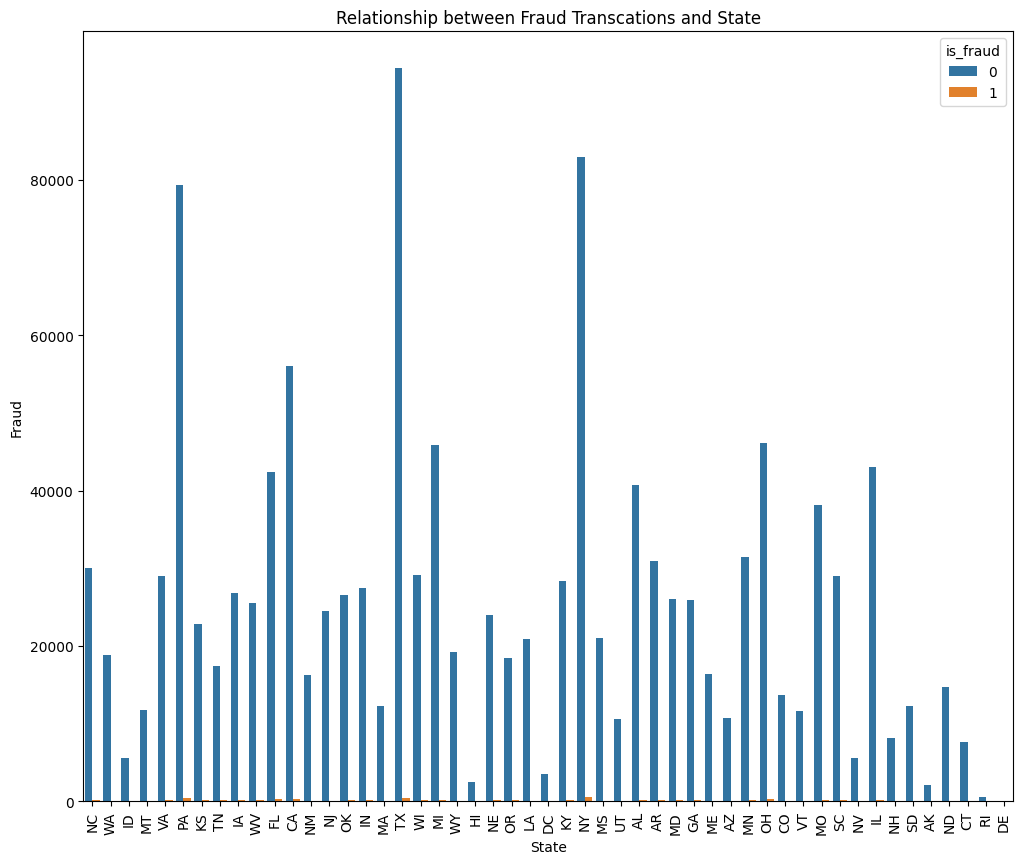

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(x = "state",data = fraud_data_train, hue = "is_fraud" )
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Fraud')
plt.title('Relationship between Fraud Transcations and State')
plt.show()

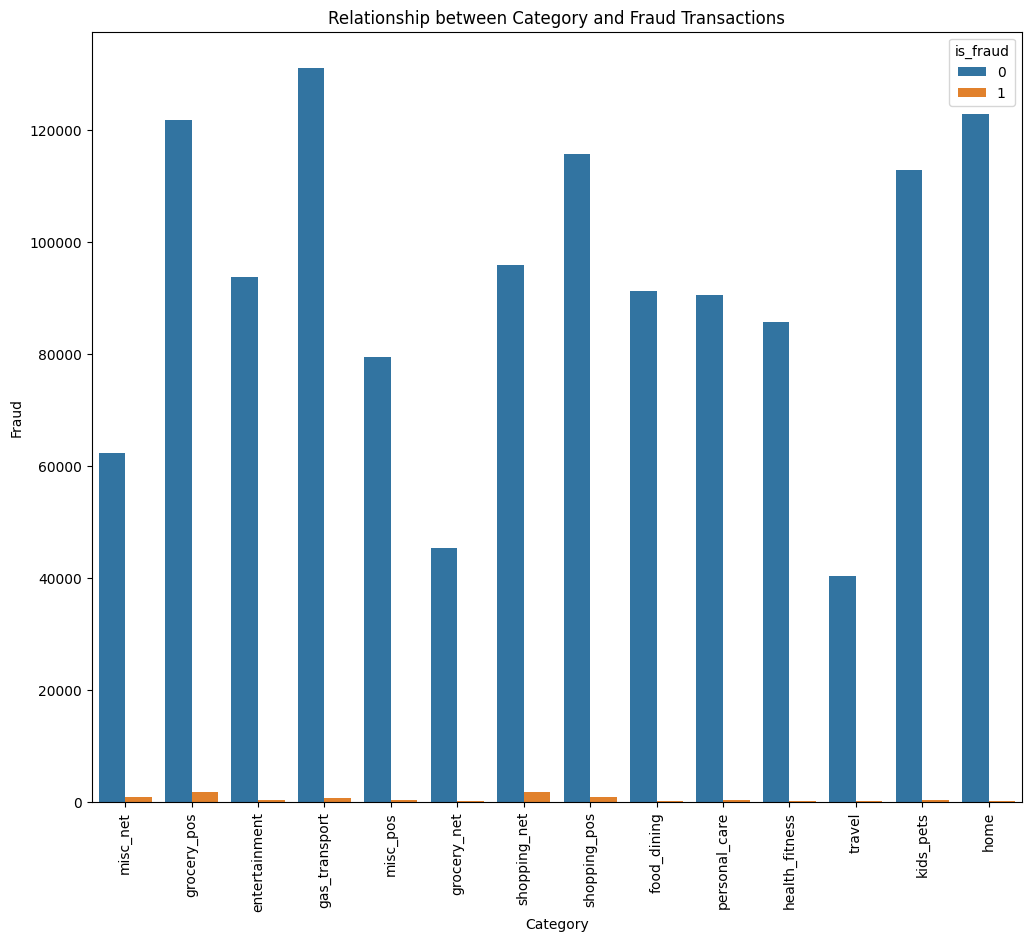

In [25]:
plt.figure(figsize=(12,10))
sns.countplot(x = "category",data = fraud_data_train, hue = "is_fraud" )
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Fraud')
plt.title('Relationship between Category and Fraud Transactions')
plt.show()

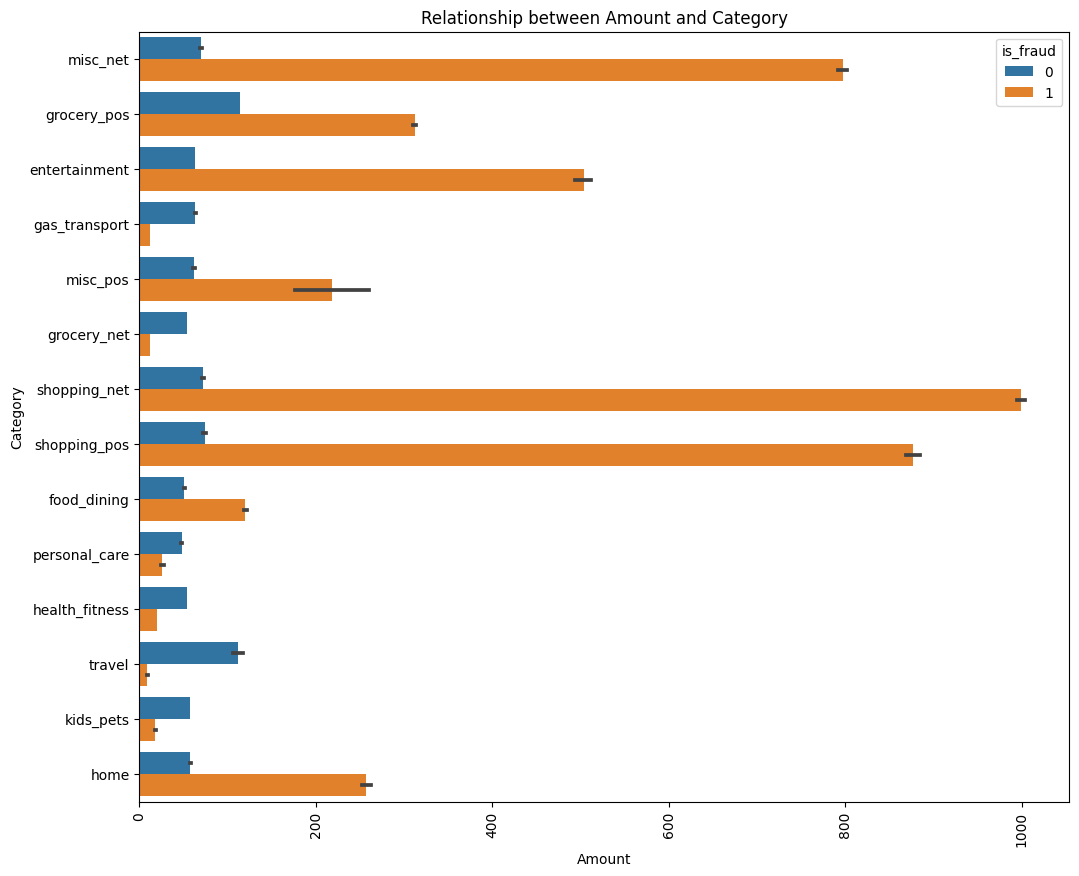

In [26]:
plt.figure(figsize=(12,10))
sns.barplot(x = "amt", y = "category", data = fraud_data_train, hue = "is_fraud")
plt.xticks(rotation=90)
plt.xlabel('Amount')
plt.ylabel('Category')
plt.title('Relationship between Amount and Category')
plt.show()

# Day 4: Identify basic patterns or trends in the data

In [27]:
fraud_count = fraud_data_train[fraud_data_train['is_fraud']==1].shape[0]
total_count = fraud_data_train.shape[0]
fraud_rate = fraud_count / total_count
print('Overall fraud rate:', fraud_rate)

Overall fraud rate: 0.005788651743883394


In [28]:
fraud_by_category = fraud_data_train.groupby('category')['is_fraud'].mean()
fraud_by_category = fraud_by_category.sort_values(ascending=False)
print('Fraud rate by category:')
print(fraud_by_category)

Fraud rate by category:
category
shopping_net      0.017561
misc_net          0.014458
grocery_pos       0.014098
shopping_pos      0.007225
gas_transport     0.004694
misc_pos          0.003139
grocery_net       0.002948
travel            0.002864
entertainment     0.002478
personal_care     0.002424
kids_pets         0.002114
food_dining       0.001651
home              0.001608
health_fitness    0.001549
Name: is_fraud, dtype: float64


In [29]:
fraud_by_state = fraud_data_train.groupby('state')['is_fraud'].mean()
fraud_by_state = fraud_by_state.sort_values(ascending=False)
print('Fraud rate by state:')
print(fraud_by_state)

Fraud rate by state:
state
DE    1.000000
RI    0.027273
AK    0.016981
NV    0.008382
CO    0.008141
OR    0.008012
TN    0.007975
NE    0.007448
ME    0.007210
NH    0.007127
OH    0.006906
KS    0.006784
VA    0.006769
NY    0.006647
SC    0.006612
FL    0.006585
MN    0.006527
VT    0.006118
SD    0.006005
MD    0.005994
DC    0.005812
CA    0.005784
PA    0.005736
IL    0.005734
UT    0.005701
WY    0.005693
WV    0.005683
GA    0.005602
MA    0.005575
WI    0.005550
KY    0.005443
MS    0.005428
OK    0.005362
IA    0.005262
AL    0.005245
AR    0.005172
MI    0.005157
IN    0.005149
WA    0.005073
TX    0.005049
NM    0.004998
MO    0.004974
NC    0.004923
NJ    0.004796
LA    0.004341
ND    0.003855
AZ    0.003435
HI    0.002735
MT    0.002722
CT    0.002077
ID    0.001984
Name: is_fraud, dtype: float64


In [30]:
fraud_by_city = fraud_data_train.groupby('city')['is_fraud'].mean()
fraud_by_city = fraud_by_city.sort_values(ascending=False)
print('Fraud rate by city:')
print(fraud_by_city)

Fraud rate by city:
city
Buellton      1.0
Winnsboro     1.0
Ashland       1.0
Clinton       1.0
Grenola       1.0
             ... 
Manville      0.0
Malad City    0.0
Luray         0.0
Lubbock       0.0
Zavalla       0.0
Name: is_fraud, Length: 894, dtype: float64


In [31]:
fraud_by_merchant = fraud_data_train.groupby('merchant')['is_fraud'].mean()
fraud_by_merchant = fraud_by_merchant.sort_values(ascending=False)
print('Fraud rate by merchant:')
print(fraud_by_merchant)

Fraud rate by merchant:
merchant
fraud_Kozey-Boehm                        0.025723
fraud_Herman, Treutel and Dickens        0.025385
fraud_Kerluke-Abshire                    0.022307
fraud_Brown PLC                          0.022109
fraud_Goyette Inc                        0.021616
                                           ...   
fraud_Osinski Inc                        0.000000
fraud_Hodkiewicz, Prohaska and Paucek    0.000000
fraud_Schroeder, Wolff and Hermiston     0.000000
fraud_Gulgowski LLC                      0.000000
fraud_Schroeder Group                    0.000000
Name: is_fraud, Length: 693, dtype: float64


# Day 5: Descriptive Statistics: calculate basic statistics

In [32]:
# print the mean, standard deviation, min, and max for the amt column
print("Fraud Statistics")

mean_amt = fraud_data_train["amt"].mean()
median_amt = fraud_data_train['amt'].median()
mode_amt = fraud_data_train['amt'].mode().values  # Mode can be multiple values
std_amt = fraud_data_train["amt"].std()
min_amt = fraud_data_train["amt"].min()
max_amt = fraud_data_train["amt"].max()
var_amt = fraud_data_train['amt'].var()


print("Mean: ", mean_amt)
print("Median: ", median_amt)
print("Mode: ", mode_amt)
print("Standard Deviation: ", std_amt)
print("Minimum: ", min_amt)
print("Maximum: ", max_amt)
print("Variance: ", var_amt)


Fraud Statistics
Mean:  70.35103545607033
Median:  47.52
Mode:  [1.14]
Standard Deviation:  160.31603857152774
Minimum:  1.0
Maximum:  28948.9
Variance:  25701.232223267572


# Day 6: Descriptive Statistics: Discuss Findings and any surprising elements in the data

**Quantiles are a type of descriptive statistic that divides a dataset into equal parts, allowing you to understand the distribution of values.**

In [33]:
fraud_data_train['amt'].quantile([0.25, 0.5, 0.75])

0.25     9.65
0.50    47.52
0.75    83.14
Name: amt, dtype: float64

25th Percentile (Q1): 25% of the transactions have amounts less than or equal to $9.65.

50th Percentile (Q2 or Median): 50% of the transactions have amounts less than or equal to $47.52.

75th Percentile (Q3): 75% of the transactions have amounts less than or equal to $83.14.

**Cramer's V is used to find the correlation between a categorical variable and a binary target variable (fraud or not fraud)
commonly used guideline is for Cramer's V :**

* 0.1 to 0.3: Small or weak correlation
* 0.3 to 0.5: Moderate correlation
* 0.5 and above: Strong or high correlation

Cramer's V =  0.07072500922873913


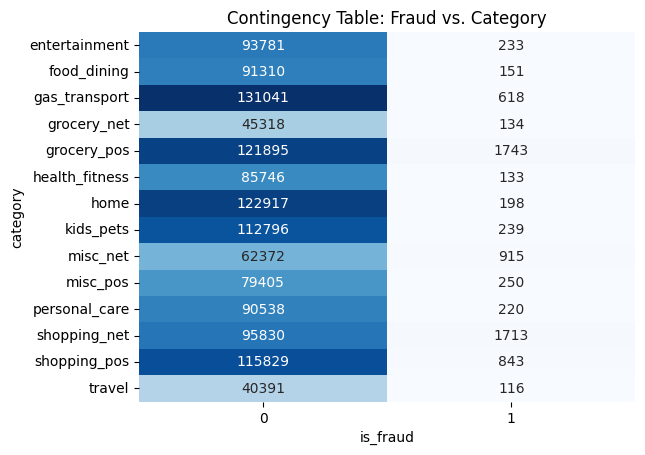

In [34]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(fraud_data_train['category'], fraud_data_train['is_fraud'])

# Chi-square test 
chi2, p, dof, expected = chi2_contingency(contingency)

# Cramer's V
observations = contingency.sum().sum()
phi2 = chi2 / observations
cramer_v = np.sqrt(phi2)


print("Cramer's V = ", cramer_v)

# Visualize the association using a heatmap
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table: Fraud vs. Category')
plt.show()

Cramer's V =  0.07310348448131467


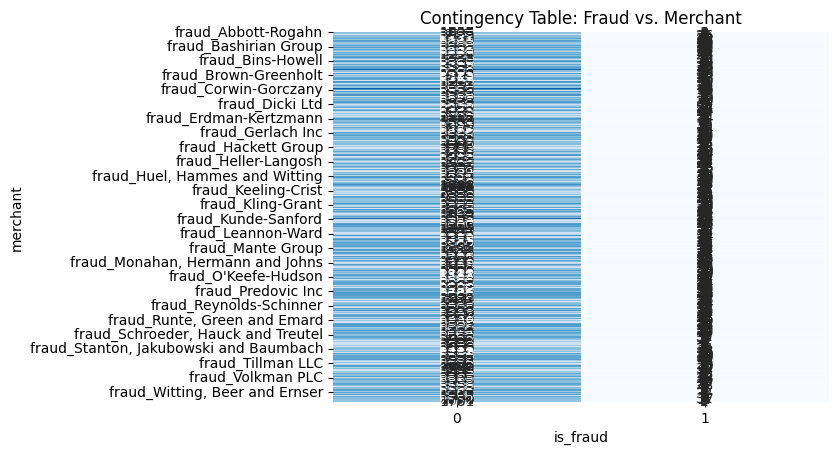

In [35]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(fraud_data_train['merchant'], fraud_data_train['is_fraud'])

# Chi-square test 
chi2, p, dof, expected = chi2_contingency(contingency)

# Cramer's V
observations = contingency.sum().sum()
phi2 = chi2 / observations
cramer_v = np.sqrt(phi2)


print("Cramer's V = ", cramer_v)

# Visualize the association using a heatmap
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table: Fraud vs. Merchant')
plt.show()

Cramer's V =  0.037968953370841926


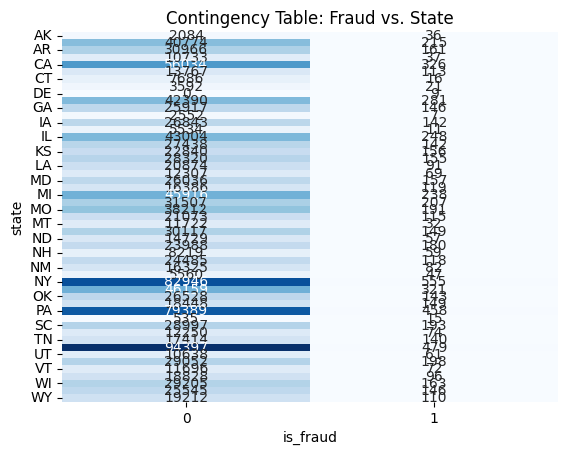

In [36]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(fraud_data_train['state'], fraud_data_train['is_fraud'])

# Chi-square test 
chi2, p, dof, expected = chi2_contingency(contingency)

# Cramer's V
observations = contingency.sum().sum()
phi2 = chi2 / observations
cramer_v = np.sqrt(phi2)


print("Cramer's V = ", cramer_v)

# Visualize the association using a heatmap
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table: Fraud vs. State')
plt.show()

Cramer's V =  0.28425972470365063


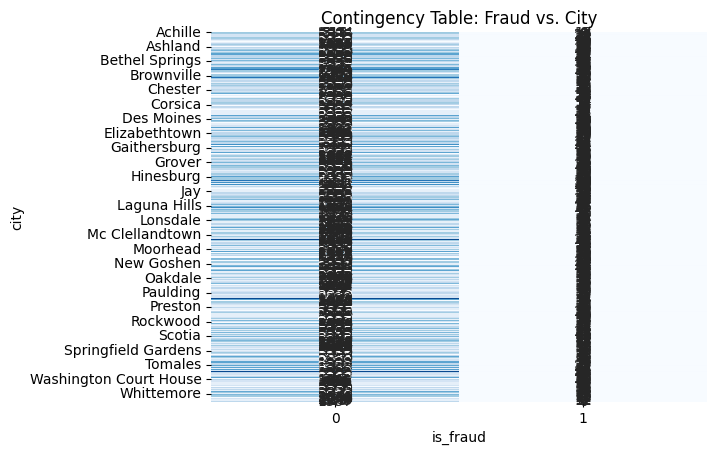

In [37]:
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(fraud_data_train['city'], fraud_data_train['is_fraud'])

# Chi-square test 
chi2, p, dof, expected = chi2_contingency(contingency)

# Cramer's V
observations = contingency.sum().sum()
phi2 = chi2 / observations
cramer_v = np.sqrt(phi2)


print("Cramer's V = ", cramer_v)

# Visualize the association using a heatmap
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table: Fraud vs. City')
plt.show()

**ANOVA, or Analysis of Variance, is a statistical test used to compare means among multiple groups. In this dataset, we have multiple categories and we want to know if there is a significant difference in the average means of a numerical value (in this case, amt) across these categories. Let's analyze each category:**

ANOVA for merchant: F-statistic = 32.58, p-value = 0.0000
ANOVA for category: F-statistic = 1679.16, p-value = 0.0000
ANOVA for state: F-statistic = 16.78, p-value = 0.0000
ANOVA for city: F-statistic = 18.86, p-value = 0.0000


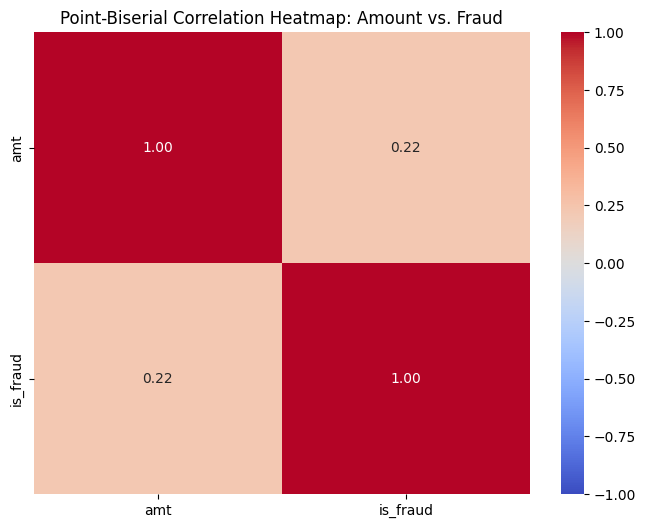

In [38]:
from scipy.stats import f_oneway
# List of categorical variables
categorical_vars = ['merchant', 'category', 'state', 'city']

# One-way ANOVA for each categorical variable
for cat_var in categorical_vars:
    anova_result = f_oneway(*[fraud_data_train['amt'][fraud_data_train[cat_var] == category] for category in fraud_data_train[cat_var].unique()])
    print(f'ANOVA for {cat_var}: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}')

# Create a heatmap for correlation between numerical variable 'amount' and binary variable 'is_fraud'
point_biserial_corr = fraud_data_train['amt'].corr(fraud_data_train['is_fraud'])
plt.figure(figsize=(8, 6))
sns.heatmap([[1, point_biserial_corr], [point_biserial_corr, 1]],
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,
            xticklabels=['amt', 'is_fraud'], yticklabels=['amt', 'is_fraud'])
plt.title('Point-Biserial Correlation Heatmap: Amount vs. Fraud')
plt.show()

ANOVA for Merchant
* F-statistic = 32.58
p-value = 0.0000 (very low)
Analysis: The F-statistic of 32.58 is relatively high, and the p-value is extremely low. This suggests that there are significant differences in the average transaction amounts among different merchants.

ANOVA for Category:

* F-statistic = 1679.16
p-value = 0.0000 (very low)
Analysis: The F-statistic of 1679.16 is very high, and the p-value is extremely low. This indicates strong evidence that there are significant differences in the average transaction amounts across different categories.

ANOVA for State:

* F-statistic = 16.78
p-value = 0.0000 (very low)
Analysis: The F-statistic of 16.78 is relatively high, and the p-value is extremely low. This suggests significant differences in the average transaction amounts among different states.

ANOVA for City:

* F-statistic = 18.86
p-value = 0.0000 (very low)
Analysis: The F-statistic of 18.86 is relatively high, and the p-value is extremely low. This indicates significant differences in the average transaction amounts among different cities.

# Day 7: Summary

**Over the past week, I embarked on a thorough exploratory data analysis (EDA) journey as part of the Women Who Code Data Science. Starting with a basic overview of its structure and identifying missing values, I progressed to creating simple visualizations like bar charts and count plots to reveal data distributions and patterns. Transitioning to the realm of descriptive statistics on Day 5, I calculated fundamental measures such as mean, median, and mode, providing a quantitative lens on central tendencies. I challeneged my self on Day 6 to gain more understanding around advanced descriptive statistics concepts around correlation such as Cramer's V and point-biserial.This journey not only honed my skills in data analysis but also highlighted the importance of iterative exploration for meaningful insights.**